In [57]:
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Pretendard" # 글꼴 설정
plt.rcParams["font.size"] = 10 # 글꼴 크기 설정
import seaborn as sns

In [58]:
! pip install plotnine

In [59]:
# !pip install plotnine # 시각화 라이브러리 => R에서 시각화하는 방법과 유사하게 시각화한다.
from plotnine import *
import missingno as msno

In [60]:
# 현재 소스 프로그램의 위치(경로)를 보여준다.
%pwd

'd:\\python\\numpy\\workspace'

In [61]:
# 현재 소스 프로그램이 위치한 경로의 파일 목록을 보여준다.
%ls data
# '%ls 폴더이름'으로 실행하면 현재 소스 프로그램이 위치한 경로 아래의 지정된 폴더의 파일 목록을 보여준다.

 D ����̺��� ����: �� ����
 ���� �Ϸ� ��ȣ: BE55-4C48

 d:\python\numpy\workspace\data ���͸�

2023-01-02  ���� 11:13    <DIR>          .
2023-01-02  ���� 11:13    <DIR>          ..
2020-03-24  ���� 10:45           326,362 a_new_hope.txt
2020-03-24  ���� 10:09           148,570 alice.txt
2020-03-24  ���� 11:22           416,516 alice_color.png
2020-03-24  ���� 10:09             7,339 alice_mask.png
2022-11-29  ���� 02:35        12,358,144 chromedriver.exe
2018-09-05  ���� 11:23                61 concat_1.csv
2018-09-05  ���� 11:23                61 concat_2.csv
2018-09-05  ���� 11:23                69 concat_3.csv
2020-03-25  ���� 12:58            45,859 constitution.txt
2022-12-29  ���� 10:48             5,796 country_timeseries.csv
2022-12-27  ���� 05:44            83,637 gapminder.tsv
2020-03-25  ���� 12:30            99,957 korea_mask.jpg
2022-12-29  ���� 12:18               984 pew.csv
2023-01-02  ���� 09:50           294,801 preSale.csv
2022-12-28  ���� 12:50               442 scient

2015년 10월부터 2021년 12월까지 주택분양보증을 받아 분양한 전체 민간 신규 아파트 분양가격 동향
공공데이터포털(https://www.data.go.kr/)에서 전국 신규 민간 아파트 분양 가격 동향 검색

In [62]:
# read_cvs() 함수로 csv 파일을 읽을 때 csv 파일의 한글 인코딩 문제가 발생하면 encoding='euc-kr' 옵션을 지정한다.
# encoding='euc-kr', encoding='cp949', encoding='ms949' 모두 같은 인코딩 방식을 의미한다.
pre_sale = pd.read_csv('./data/전국_평균_분양가격_2021년_6월.csv', encoding='euc-kr')
# pre_sale = pd.read_csv('./data/preSale.csv', encoding='cp949')
pre_sale.shape

(6375, 5)

In [63]:
pre_sale.head()

지역명                     규모구분    연도   월 분양가격(제곱미터)
0  서울                     모든면적  2015  10       5841
1  서울            전용면적 60제곱미터이하  2015  10       5652
2  서울   전용면적 60제곱미터초과 85제곱미터이하  2015  10       5882
3  서울  전용면적 85제곱미터초과 102제곱미터이하  2015  10       5721
4  서울           전용면적 102제곱미터초과  2015  10       5879

In [64]:
pre_sale.tail()

지역명                     규모구분    연도   월 분양가격(제곱미터)
6370  제주                     모든면적  2021  12       6574
6371  제주            전용면적 60제곱미터이하  2021  12       2862
6372  제주   전용면적 60제곱미터초과 85제곱미터이하  2021  12       6516
6373  제주  전용면적 85제곱미터초과 102제곱미터이하  2021  12       5924
6374  제주           전용면적 102제곱미터초과  2021  12       6493

encoding 옵션을 지정하지 않고 사용하려면 csv 파일을 메모장으로 열고, 파일-'다른 이름으로 저장'을 선택해서 인코딩 방식을 'UTF-8'로 바꾼다.

dtypes 속성이나 info() 함수를 이용해서 데이터프레임을 구성하는 데이터 타입을 확인하고 필요하면 변경한다.

In [65]:
pre_sale.dtypes

지역명           object
규모구분          object
연도             int64
월              int64
분양가격(제곱미터)    object
dtype: object

In [66]:
# 연도와 월은 연산에 사용되는 데이터가 아니라 구분에 사용되는 카테고리 형태의 데이터이므로 문자열로 변환한다.
pre_sale['연도'] = pre_sale['연도'].astype(str)
# 데이터프레임의 특정 열 1개를 얻어올 때 '데이터프레임[열]', '데이터프레임.get(열)', '데이터프레임.열' 모두 사용이 가능하지만, 데이터프레임의 특정 열에 데이터를 넣어줄 때믐 '데이터프레임.get(열)'을 사용하면 에러가 발생한다.
pre_sale['월'] = pre_sale['월'].astype(str)

In [67]:
pre_sale.dtypes

지역명           object
규모구분          object
연도            object
월             object
분양가격(제곱미터)    object
dtype: object

In [68]:
# 분양가격(제곱미터)는 연산에 사용되는 데이터이므로 숫자로 변경한다.
# pre_sale['분양가격(제곱미터)'] = pre_sale['분양가격(제곱미터)'].astype(float)
# astype() 함수로 문자열을 숫자로 변경하려는 경우 숫자가 아닌 문자열이 있으면 에러가 발생한다. 이 때 to_numeric() 함수를 사용하면 어느정도 오류를 제어할 수 있다.
# to_numeric() 함수의 errors 속성의 기본값은 raise로, 숫자로 변경할 수 없는 값이 있으면 오류를 발생시킨다.
# ignore를 사용하면 숫자로 변경할 수 없는 값이 있으면 함수 실행을 무시하고 coerce를 사용하면 오류가 발생된 데이터를 누락값으로 변경한다.
# 2021년 9월 데이터부터 '분양가격(제곱미터)' 열의 데이터 문제로 누락값으로 처리됨 => 엑셀을 열어서 데이터 서식 변경
pre_sale['분양가격(제곱미터)'] = pd.to_numeric(pre_sale['분양가격(제곱미터)'],errors='coerce')
pre_sale


지역명                     규모구분    연도   월  분양가격(제곱미터)
0     서울                     모든면적  2015  10      5841.0
1     서울            전용면적 60제곱미터이하  2015  10      5652.0
2     서울   전용면적 60제곱미터초과 85제곱미터이하  2015  10      5882.0
3     서울  전용면적 85제곱미터초과 102제곱미터이하  2015  10      5721.0
4     서울           전용면적 102제곱미터초과  2015  10      5879.0
...   ..                      ...   ...  ..         ...
6370  제주                     모든면적  2021  12      6574.0
6371  제주            전용면적 60제곱미터이하  2021  12      2862.0
6372  제주   전용면적 60제곱미터초과 85제곱미터이하  2021  12      6516.0
6373  제주  전용면적 85제곱미터초과 102제곱미터이하  2021  12      5924.0
6374  제주           전용면적 102제곱미터초과  2021  12      6493.0

[6375 rows x 5 columns]

In [70]:
# 분양가격(제곱미터)은 연산에 사용되는 데이터이므로 숫자로 변경하고 평당 분양 가격을 계산한 열을 추가한다.
pre_sale['평당분양가격'] = pre_sale['분양가격(제곱미터)'] * 3.3
pre_sale.dtypes

지역명            object
규모구분           object
연도             object
월              object
분양가격(제곱미터)    float64
평당분양가격        float64
dtype: object

In [71]:
pre_sale

지역명                     규모구분    연도   월  분양가격(제곱미터)   평당분양가격
0     서울                     모든면적  2015  10      5841.0  19275.3
1     서울            전용면적 60제곱미터이하  2015  10      5652.0  18651.6
2     서울   전용면적 60제곱미터초과 85제곱미터이하  2015  10      5882.0  19410.6
3     서울  전용면적 85제곱미터초과 102제곱미터이하  2015  10      5721.0  18879.3
4     서울           전용면적 102제곱미터초과  2015  10      5879.0  19400.7
...   ..                      ...   ...  ..         ...      ...
6370  제주                     모든면적  2021  12      6574.0  21694.2
6371  제주            전용면적 60제곱미터이하  2021  12      2862.0   9444.6
6372  제주   전용면적 60제곱미터초과 85제곱미터이하  2021  12      6516.0  21502.8
6373  제주  전용면적 85제곱미터초과 102제곱미터이하  2021  12      5924.0  19549.2
6374  제주           전용면적 102제곱미터초과  2021  12      6493.0  21426.9

[6375 rows x 6 columns]

In [72]:
# isnull() 함수와 sum() 함수를 사용해서 누락값이 존재하는가 확인하기
print(pre_sale.isnull().sum())

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    515
평당분양가격        515
dtype: int64


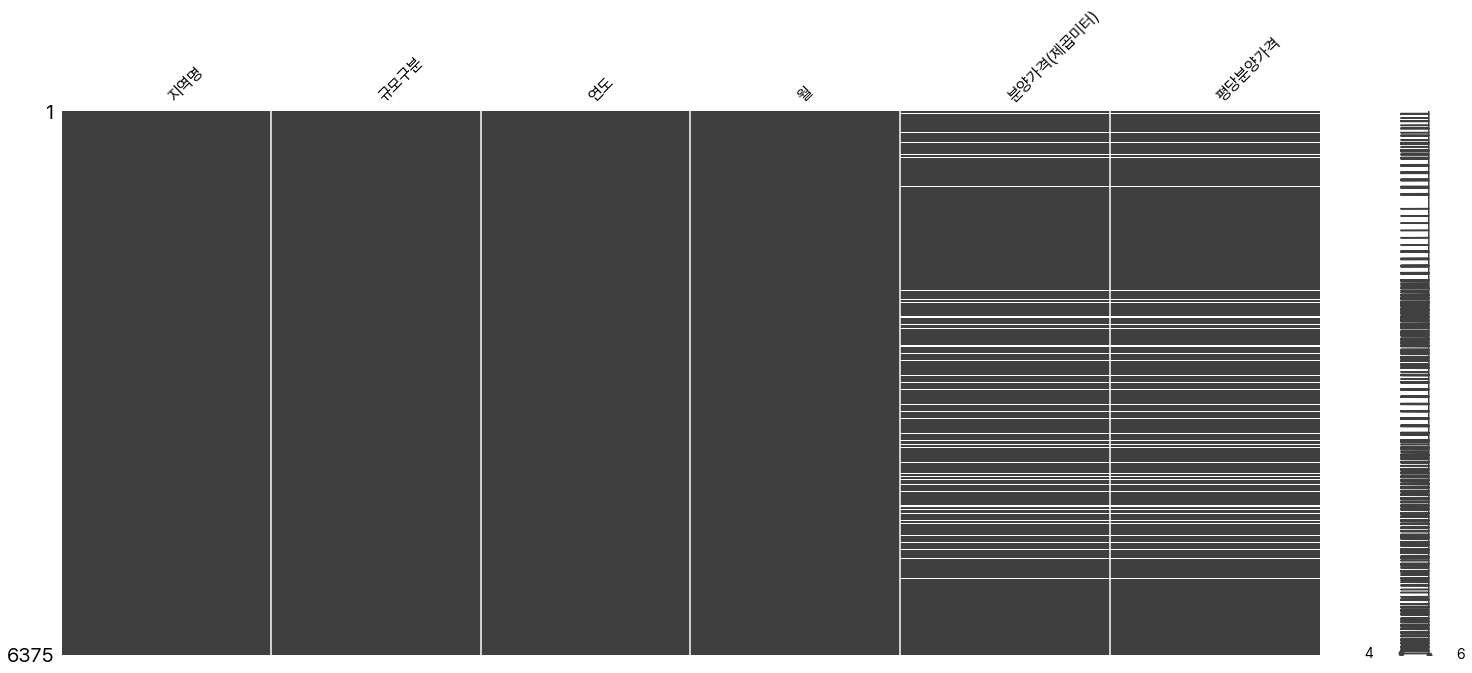

In [75]:
# missingno 라이브러리로 그래프를 그려서 누락값 확인
msno.matrix(pre_sale)
plt.show()

In [79]:
# 2017년 데이터만 추출한다.
# pre_sale_2017 = pre_sale[pre_sale['연도'] == '2017']
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017']
pre_sale_2017

지역명                     규모구분    연도   월  분양가격(제곱미터)   평당분양가격
1275  서울                     모든면적  2017   1      6450.0  21285.0
1276  서울            전용면적 60제곱미터이하  2017   1      6662.0  21984.6
1277  서울   전용면적 60제곱미터초과 85제곱미터이하  2017   1      6500.0  21450.0
1278  서울  전용면적 85제곱미터초과 102제곱미터이하  2017   1      7030.0  23199.0
1279  서울           전용면적 102제곱미터초과  2017   1      6771.0  22344.3
...   ..                      ...   ...  ..         ...      ...
2290  제주                     모든면적  2017  12      3578.0  11807.4
2291  제주            전용면적 60제곱미터이하  2017  12      5380.0  17754.0
2292  제주   전용면적 60제곱미터초과 85제곱미터이하  2017  12      3467.0  11441.1
2293  제주  전용면적 85제곱미터초과 102제곱미터이하  2017  12         NaN      NaN
2294  제주           전용면적 102제곱미터초과  2017  12      3029.0   9995.7

[1020 rows x 6 columns]

In [83]:
# 시도별 데이터가 동일하게 저장되어 있다.
pre_sale_2017['지역명'].value_counts()

충남    60
인천    60
경남    60
대전    60
광주    60
경기    60
경북    60
강원    60
전북    60
전남    60
대구    60
부산    60
충북    60
세종    60
울산    60
서울    60
제주    60
Name: 지역명, dtype: int64

In [84]:
# 지역별 데이가 동일하게 저장되어 있다.
pre_sale_2017['규모구분'].value_counts()

전용면적 85제곱미터초과 102제곱미터이하    204
전용면적 60제곱미터이하              204
모든면적                       204
전용면적 60제곱미터초과 85제곱미터이하     204
전용면적 102제곱미터초과             204
Name: 규모구분, dtype: int64

전국 연도별 평균 분양 가격

In [88]:
pre_sale.groupby(pre_sale['연도'])['평당분양가격']

In [120]:
# 데이터프레임에 저장된 실수 데이터의 출력 서식 지정하기
# 출력 서식 '{:,.1f}'는 천 단위마다 ','을 출력하고 '.' 뒤의 숫자만큼 소수점 아래 자리를 표시한다.
# 'f'를 붙이지 않으면 지수 형태로 표시된다.
pd.options.display.float_format = '{:,.2f}'.format

In [121]:
# describe() 함수로 데이터프레임의 숫자 데이터가 저장된 열의 요약 통계량을 확인할 수 있다.
pre_sale.groupby(pre_sale['연도']).describe()

분양가격(제곱미터)                                                        \
          count     mean      std      min      25%      50%      75%   
연도                                                                      
2015     243.00 2,788.71   976.86 1,868.00 2,225.00 2,516.00 3,025.50   
2016     984.00 2,934.25 1,071.44 1,900.00 2,282.00 2,672.00 3,148.50   
2017     975.00 3,143.31 1,110.52 1,976.00 2,373.00 2,838.00 3,466.00   
2018     919.00 3,326.95 1,186.09 2,076.00 2,525.00 2,952.00 3,698.00   
2019     912.00 3,693.42 1,563.21 2,124.00 2,635.50 3,395.00 4,066.25   
2020     882.00 3,951.34 1,632.75 2,297.00 2,780.50 3,734.50 4,441.00   
2021     945.00 4,132.13 1,567.69 2,409.00 3,057.00 3,858.00 4,539.00   

               평당분양가격                                                  \
           max  count      mean      std      min       25%       50%   
연도                                                                      
2015  7,092.00 243.00  9,202.74 3,223.64 6,164.40  7,342.50  8,302.80   
2016  8,096.00 984.00  9,683.03 3,535.76 6,270.00  7,530.60  8,817.60   
2017  7,887.00 975.00 10,372.93 3,664.70 6,520.80  7,830.90  9,365.40   
2018  8,098.00 919.00 10,978.94 3,914.10 6,850.80  8,332.50  9,741.60   
2019 12,728.00 912.00 12,188.29 5,158.58 7,009.20  8,697.15 11,203.50   
2020 13,835.00 882.00 13,039.42 5,388.07 7,580.10  9,175.65 12,323.85   
2021 10,746.00 945.00 13,636.02 5,173.38 7,949.70 10,088.10 12,731.40   

                          
           75%       max  
연도                        
2015  9,984.15 23,403.60  
2016 10,390.05 26,716.80  
2017 11,437.80 26,027.10  
2018 12,203.40 26,723.40  
2019 13,418.62 42,002.40  
2020 14,655.30 45,655.50  
2021 14,978.70 35,461.80

In [90]:
# describe() 함수 실행 결과 'T' 속성을 지정해서 함수 실행 결과를 전치시켜서 요약 통계량이 수직 방향이 되도록 출력할 수 있다.
pre_sale.groupby(pre_sale['연도']).describe().T

연도                        2015          2016          2017          2018  \
분양가격(제곱미터) count    243.000000    984.000000    975.000000    919.000000   
           mean    2788.707819   2934.250000   3143.311795   3326.951034   
           std      976.861182   1071.441561   1110.515671   1186.090839   
           min     1868.000000   1900.000000   1976.000000   2076.000000   
           25%     2225.000000   2282.000000   2373.000000   2525.000000   
           50%     2516.000000   2672.000000   2838.000000   2952.000000   
           75%     3025.500000   3148.500000   3466.000000   3698.000000   
           max     7092.000000   8096.000000   7887.000000   8098.000000   
평당분양가격     count    243.000000    984.000000    975.000000    919.000000   
           mean    9202.735802   9683.025000  10372.928923  10978.938411   
           std     3223.641902   3535.757150   3664.701713   3914.099768   
           min     6164.400000   6270.000000   6520.800000   6850.800000   
           25%     7342.500000   7530.600000   7830.900000   8332.500000   
           50%     8302.800000   8817.600000   9365.400000   9741.600000   
           75%     9984.150000  10390.050000  11437.800000  12203.400000   
           max    23403.600000  26716.800000  26027.100000  26723.400000   

연도                        2019          2020          2021  
분양가격(제곱미터) count    912.000000    882.000000    945.000000  
           mean    3693.422149   3951.340136   4132.128042  
           std     1563.205566   1632.748747   1567.691411  
           min     2124.000000   2297.000000   2409.000000  
           25%     2635.500000   2780.500000   3057.000000  
           50%     3395.000000   3734.500000   3858.000000  
           75%     4066.250000   4441.000000   4539.000000  
           max    12728.000000  13835.000000  10746.000000  
평당분양가격     count    912.000000    882.000000    945.000000  
           mean   12188.293092  13039.422449  13636.022540  
           std     5158.578369   5388.070866   5173.381656  
           min     7009.200000   7580.100000   7949.700000  
           25%     8697.150000   9175.650000  10088.100000  
           50%    11203.500000  12323.850000  12731.400000  
           75%    13418.625000  14655.300000  14978.700000  
           max    42002.400000  45655.500000  35461.800000

전국 규모별 연도별 평균 평당 분양 가격

In [101]:
# pivot_table() 함수는 엑셀의 피벗 테이블과 유사한 형태로 데이터를 출력한다.
# pivot_table(values, index, columns, aggfunc, fill_value)
# values: 피벗 테이블을 작성할 데이터프레임의 열을 지정한다.
# index: 그룹화의 첫 번째 기준으로 사용할 데이터프레임의 열을 지정한다. => 행 단위 그룹화
# columns: 그룹화의 두 번째 기준으로 사용할 데이터프레임의 열을 지정한다. => 열 단위 그룹화
# addfunc: 그룹화된 결과에 적용할 함수를 지정한다. count, sum, mean(기본값), max, min, std, median...
# fill_value: NaN을 대체할 데이터를 지정한다. => 주로 0 사용
pre_sale.pivot_table('평당분양가격', '규모구분','연도', aggfunc='mean', fill_value=0)

연도                              2015          2016          2017  \
규모구분                                                               
모든면적                     8893.047059   9293.042647   9927.322059   
전용면적 102제곱미터초과           9837.226667  10388.728272  11311.244162   
전용면적 60제곱미터이하            8951.525000   9398.876119  10271.375635   
전용면적 60제곱미터초과 85제곱미터이하   8891.817647   9295.986765   9840.438235   
전용면적 85제곱미터초과 102제곱미터이하  9518.506250  10122.355435  10573.447977   

연도                               2018          2019          2020  \
규모구분                                                                
모든면적                     10675.825123  11602.715816  12317.716667   
전용면적 102제곱미터초과           11445.574576  13331.520968  14068.432919   
전용면적 60제곱미터이하            10844.409783  11506.803371  12400.844211   
전용면적 60제곱미터초과 85제곱미터이하   10650.611823  11677.201531  12327.480000   
전용면적 85제곱미터초과 102제곱미터이하  11441.707895  12980.676923  14759.608696   

연도                               2021  
규모구분                                   
모든면적                     13706.889706  
전용면적 102제곱미터초과           14380.755172  
전용면적 60제곱미터이하            12983.757868  
전용면적 60제곱미터초과 85제곱미터이하   13644.416176  
전용면적 85제곱미터초과 102제곱미터이하  13532.067470

전국 지역별 평균 평당 분양 가격

In [104]:
# 규모 구분이 전체로 되어있는 평당 평균 분양 가격으로 연도별 변동 금액을 살펴본다.
region_year_all = pre_sale[pre_sale['규모구분'] == '모든면적']
region_year_all

지역명  규모구분    연도   월  분양가격(제곱미터)   평당분양가격
0     서울  모든면적  2015  10      5841.0  19275.3
5     인천  모든면적  2015  10      3163.0  10437.9
10    경기  모든면적  2015  10      3138.0  10355.4
15    부산  모든면적  2015  10      3112.0  10269.6
20    대구  모든면적  2015  10      2682.0   8850.6
...   ..   ...   ...  ..         ...      ...
6350  전북  모든면적  2021  12      2777.0   9164.1
6355  전남  모든면적  2021  12      2892.0   9543.6
6360  경북  모든면적  2021  12      3297.0  10880.1
6365  경남  모든면적  2021  12      3309.0  10919.7
6370  제주  모든면적  2021  12      6574.0  21694.2

[1275 rows x 6 columns]

In [111]:
# pivot_table() 함수의 실행 결과는 2번째 인수(index)가 피벗 테이블의 index로 사용되므로 기존 index를 데이터로 사용하고 index를 다시 지정하려면 pivot_table의 reset_index() 함수를 사용한다.
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
region_year

연도 지역명     2015       2016       2017       2018       2019       2020  \
0   강원   7159.9   7011.125   7170.625   7680.750   8141.650   9331.300   
1   경기  10377.4  11220.000  11840.675  13185.975  14468.850  14383.325   
2   경남   7585.6   7847.950   8163.925   9019.450   9870.850  10160.700   
3   경북   7170.9   7360.650   7802.575   8505.200   8856.650   9544.975   
4   광주   8052.0   8898.725   9471.000   9855.725  11822.800  12500.125   
5   대구   9232.3  10310.025  11507.100  12075.800  13852.025  15145.075   
6   대전   8098.2   8501.625   9056.025  10180.225  11777.700  11094.050   
7   부산  10307.0  10429.925  11663.575  12997.875  13116.400  13247.575   
8   서울  19725.2  20663.500  21425.250  22889.350  26131.050  26910.125   
9   세종   8750.5   8860.500   9133.025  10354.850  11078.925  11355.300   
10  울산  10052.9  10208.550  11327.525  10241.400  10022.100  12202.850   
11  인천  10484.1  10532.500  10749.475  11273.900  12634.875  14674.000   
12  전남   6317.3   6488.625   7245.700   7789.100   7902.400   8696.875   
13  전북   6703.4   6417.950   7074.650   7625.750   8196.650   8317.100   
14  제주   7405.2   9129.175  10907.325  11890.725  12137.950  14540.900   
15  충남   7114.8   7330.675   7455.800   8012.675   8606.950   8856.100   
16  충북   6645.1   6770.225   6770.225   7874.075   7574.600   7959.600   

연도       2021  
0    9716.850  
1   14183.125  
2   10505.000  
3   10333.400  
4   14020.875  
5   15558.125  
6   11914.100  
7   14645.675  
8   30115.250  
9   12561.175  
10  14274.975  
11  14991.625  
12   9907.700  
13   8838.500  
14  23423.950  
15   9345.600  
16   8681.200

In [122]:
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
region_year.head()

연도 지역명      2015      2016      2017      2018      2019      2020      2021
0   강원  7,159.90  7,011.12  7,170.63  7,680.75  8,141.65  9,331.30  9,716.85
1   경기 10,377.40 11,220.00 11,840.67 13,185.97 14,468.85 14,383.32 14,183.12
2   경남  7,585.60  7,847.95  8,163.93  9,019.45  9,870.85 10,160.70 10,505.00
3   경북  7,170.90  7,360.65  7,802.58  8,505.20  8,856.65  9,544.97 10,333.40
4   광주  8,052.00  8,898.72  9,471.00  9,855.73 11,822.80 12,500.12 14,020.88

In [135]:
print(region_year.columns)
print(region_year.columns.name)
# 데이터프레임의 columns 속성에 리스트 형태로 컬럼 이름을 넘겨서 전체 컬럼 이름을 일괄적으로 변경할 수 있다.
region_year.columns = ['지역', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년']
print(region_year.columns)
region_year.columns.name = '일련번호' # 인덱스의 열 이름을 변경한다.
region_year.head()

Index(['지역', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년'], dtype='object', name='일련번호')
일련번호
Index(['지역', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년'], dtype='object')


일련번호  지역     2015년     2016년     2017년     2018년     2019년     2020년     2021년
0     강원  7,159.90  7,011.12  7,170.63  7,680.75  8,141.65  9,331.30  9,716.85
1     경기 10,377.40 11,220.00 11,840.67 13,185.97 14,468.85 14,383.32 14,183.12
2     경남  7,585.60  7,847.95  8,163.93  9,019.45  9,870.85 10,160.70 10,505.00
3     경북  7,170.90  7,360.65  7,802.58  8,505.20  8,856.65  9,544.97 10,333.40
4     광주  8,052.00  8,898.72  9,471.00  9,855.73 11,822.80 12,500.12 14,020.88

In [128]:
# rename() 함수로 특정 컬럼 이름을 선택해서 변경할 수 있다. 열이름이 변경된 데이터프레임을 저장해야 적용된다.
region_year = region_year.rename(columns={'지역': '지역이름'})
region_year

지역이름     2015년     2016년     2017년     2018년     2019년     2020년     2021년
0    강원  7,159.90  7,011.12  7,170.63  7,680.75  8,141.65  9,331.30  9,716.85
1    경기 10,377.40 11,220.00 11,840.67 13,185.97 14,468.85 14,383.32 14,183.12
2    경남  7,585.60  7,847.95  8,163.93  9,019.45  9,870.85 10,160.70 10,505.00
3    경북  7,170.90  7,360.65  7,802.58  8,505.20  8,856.65  9,544.97 10,333.40
4    광주  8,052.00  8,898.72  9,471.00  9,855.73 11,822.80 12,500.12 14,020.88
5    대구  9,232.30 10,310.02 11,507.10 12,075.80 13,852.03 15,145.07 15,558.12
6    대전  8,098.20  8,501.63  9,056.02 10,180.22 11,777.70 11,094.05 11,914.10
7    부산 10,307.00 10,429.92 11,663.57 12,997.87 13,116.40 13,247.57 14,645.67
8    서울 19,725.20 20,663.50 21,425.25 22,889.35 26,131.05 26,910.12 30,115.25
9    세종  8,750.50  8,860.50  9,133.02 10,354.85 11,078.92 11,355.30 12,561.18
10   울산 10,052.90 10,208.55 11,327.53 10,241.40 10,022.10 12,202.85 14,274.97
11   인천 10,484.10 10,532.50 10,749.47 11,273.90 12,634.88 14,674.00 14,991.62
12   전남  6,317.30  6,488.62  7,245.70  7,789.10  7,902.40  8,696.87  9,907.70
13   전북  6,703.40  6,417.95  7,074.65  7,625.75  8,196.65  8,317.10  8,838.50
14   제주  7,405.20  9,129.17 10,907.32 11,890.73 12,137.95 14,540.90 23,423.95
15   충남  7,114.80  7,330.68  7,455.80  8,012.68  8,606.95  8,856.10  9,345.60
16   충북  6,645.10  6,770.22  6,770.23  7,874.08  7,574.60  7,959.60  8,681.20

In [130]:
# inplace=True 옵션을 지정하면 함수가 실행된 결과를 다시 저장하지 않아도 데이터프레임에 반영한다.
region_year.rename(columns={'지역이름': '지역'}, inplace=True)
region_year.head()

지역     2015년     2016년     2017년     2018년     2019년     2020년     2021년
0  강원  7,159.90  7,011.12  7,170.63  7,680.75  8,141.65  9,331.30  9,716.85
1  경기 10,377.40 11,220.00 11,840.67 13,185.97 14,468.85 14,383.32 14,183.12
2  경남  7,585.60  7,847.95  8,163.93  9,019.45  9,870.85 10,160.70 10,505.00
3  경북  7,170.90  7,360.65  7,802.58  8,505.20  8,856.65  9,544.97 10,333.40
4  광주  8,052.00  8,898.72  9,471.00  9,855.73 11,822.80 12,500.12 14,020.88

In [133]:
# 특정 컬럼에 접근할 때 인덱싱을 사용할 수 있다.
print(region_year.columns[0])
for i in range(1, 8):
    region_year.rename(columns={region_year.columns[i]: i + 2014}, inplace=True)

region_year.head()

지역


지역      2015      2016      2017      2018      2019      2020      2021
0  강원  7,159.90  7,011.12  7,170.63  7,680.75  8,141.65  9,331.30  9,716.85
1  경기 10,377.40 11,220.00 11,840.67 13,185.97 14,468.85 14,383.32 14,183.12
2  경남  7,585.60  7,847.95  8,163.93  9,019.45  9,870.85 10,160.70 10,505.00
3  경북  7,170.90  7,360.65  7,802.58  8,505.20  8,856.65  9,544.97 10,333.40
4  광주  8,052.00  8,898.72  9,471.00  9,855.73 11,822.80 12,500.12 14,020.88

In [138]:
print(list(region_year.index))
region_year.index = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16' ]
region_year

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16']


일련번호  지역     2015년     2016년     2017년     2018년     2019년     2020년     2021년
00    강원  7,159.90  7,011.12  7,170.63  7,680.75  8,141.65  9,331.30  9,716.85
01    경기 10,377.40 11,220.00 11,840.67 13,185.97 14,468.85 14,383.32 14,183.12
02    경남  7,585.60  7,847.95  8,163.93  9,019.45  9,870.85 10,160.70 10,505.00
03    경북  7,170.90  7,360.65  7,802.58  8,505.20  8,856.65  9,544.97 10,333.40
04    광주  8,052.00  8,898.72  9,471.00  9,855.73 11,822.80 12,500.12 14,020.88
05    대구  9,232.30 10,310.02 11,507.10 12,075.80 13,852.03 15,145.07 15,558.12
06    대전  8,098.20  8,501.63  9,056.02 10,180.22 11,777.70 11,094.05 11,914.10
07    부산 10,307.00 10,429.92 11,663.57 12,997.87 13,116.40 13,247.57 14,645.67
08    서울 19,725.20 20,663.50 21,425.25 22,889.35 26,131.05 26,910.12 30,115.25
09    세종  8,750.50  8,860.50  9,133.02 10,354.85 11,078.92 11,355.30 12,561.18
10    울산 10,052.90 10,208.55 11,327.53 10,241.40 10,022.10 12,202.85 14,274.97
11    인천 10,484.10 10,532.50 10,749.47 11,273.90 12,634.88 14,674.00 14,991.62
12    전남  6,317.30  6,488.62  7,245.70  7,789.10  7,902.40  8,696.87  9,907.70
13    전북  6,703.40  6,417.95  7,074.65  7,625.75  8,196.65  8,317.10  8,838.50
14    제주  7,405.20  9,129.17 10,907.32 11,890.73 12,137.95 14,540.90 23,423.95
15    충남  7,114.80  7,330.68  7,455.80  8,012.68  8,606.95  8,856.10  9,345.60
16    충북  6,645.10  6,770.22  6,770.23  7,874.08  7,574.60  7,959.60  8,681.20

In [140]:
# rename() 함수로 특정 인덱스 이름을 선택해서 변경할 수 있다.
region_year.rename(index={'00': '영번째'}, inplace=True)
region_year

일련번호  지역     2015년     2016년     2017년     2018년     2019년     2020년     2021년
영번째   강원  7,159.90  7,011.12  7,170.63  7,680.75  8,141.65  9,331.30  9,716.85
01    경기 10,377.40 11,220.00 11,840.67 13,185.97 14,468.85 14,383.32 14,183.12
02    경남  7,585.60  7,847.95  8,163.93  9,019.45  9,870.85 10,160.70 10,505.00
03    경북  7,170.90  7,360.65  7,802.58  8,505.20  8,856.65  9,544.97 10,333.40
04    광주  8,052.00  8,898.72  9,471.00  9,855.73 11,822.80 12,500.12 14,020.88
05    대구  9,232.30 10,310.02 11,507.10 12,075.80 13,852.03 15,145.07 15,558.12
06    대전  8,098.20  8,501.63  9,056.02 10,180.22 11,777.70 11,094.05 11,914.10
07    부산 10,307.00 10,429.92 11,663.57 12,997.87 13,116.40 13,247.57 14,645.67
08    서울 19,725.20 20,663.50 21,425.25 22,889.35 26,131.05 26,910.12 30,115.25
09    세종  8,750.50  8,860.50  9,133.02 10,354.85 11,078.92 11,355.30 12,561.18
10    울산 10,052.90 10,208.55 11,327.53 10,241.40 10,022.10 12,202.85 14,274.97
11    인천 10,484.10 10,532.50 10,749.47 11,273.90 12,634.88 14,674.00 14,991.62
12    전남  6,317.30  6,488.62  7,245.70  7,789.10  7,902.40  8,696.87  9,907.70
13    전북  6,703.40  6,417.95  7,074.65  7,625.75  8,196.65  8,317.10  8,838.50
14    제주  7,405.20  9,129.17 10,907.32 11,890.73 12,137.95 14,540.90 23,423.95
15    충남  7,114.80  7,330.68  7,455.80  8,012.68  8,606.95  8,856.10  9,345.60
16    충북  6,645.10  6,770.22  6,770.23  7,874.08  7,574.60  7,959.60  8,681.20

In [143]:
# 특정 인덱스 이름에 접근할 때 인덱싱을 사용할 수 있다.
print(region_year.index[0])
for i in range(17):
    region_year.rename(index={region_year.index[i]:i}, inplace=True)
region_year.head()


0


일련번호  지역     2015년     2016년     2017년     2018년     2019년     2020년     2021년
0     강원  7,159.90  7,011.12  7,170.63  7,680.75  8,141.65  9,331.30  9,716.85
1     경기 10,377.40 11,220.00 11,840.67 13,185.97 14,468.85 14,383.32 14,183.12
2     경남  7,585.60  7,847.95  8,163.93  9,019.45  9,870.85 10,160.70 10,505.00
3     경북  7,170.90  7,360.65  7,802.58  8,505.20  8,856.65  9,544.97 10,333.40
4     광주  8,052.00  8,898.72  9,471.00  9,855.73 11,822.80 12,500.12 14,020.88

전국 지역별 평균 분양 가격 변동 금액

In [146]:
region_year['변동액'] = region_year['2021년'] - region_year['2015년']
region_year

일련번호  지역     2015년     2016년     2017년     2018년     2019년     2020년  \
0     강원  7,159.90  7,011.12  7,170.63  7,680.75  8,141.65  9,331.30   
1     경기 10,377.40 11,220.00 11,840.67 13,185.97 14,468.85 14,383.32   
2     경남  7,585.60  7,847.95  8,163.93  9,019.45  9,870.85 10,160.70   
3     경북  7,170.90  7,360.65  7,802.58  8,505.20  8,856.65  9,544.97   
4     광주  8,052.00  8,898.72  9,471.00  9,855.73 11,822.80 12,500.12   
5     대구  9,232.30 10,310.02 11,507.10 12,075.80 13,852.03 15,145.07   
6     대전  8,098.20  8,501.63  9,056.02 10,180.22 11,777.70 11,094.05   
7     부산 10,307.00 10,429.92 11,663.57 12,997.87 13,116.40 13,247.57   
8     서울 19,725.20 20,663.50 21,425.25 22,889.35 26,131.05 26,910.12   
9     세종  8,750.50  8,860.50  9,133.02 10,354.85 11,078.92 11,355.30   
10    울산 10,052.90 10,208.55 11,327.53 10,241.40 10,022.10 12,202.85   
11    인천 10,484.10 10,532.50 10,749.47 11,273.90 12,634.88 14,674.00   
12    전남  6,317.30  6,488.62  7,245.70  7,789.10  7,902.40  8,696.87   
13    전북  6,703.40  6,417.95  7,074.65  7,625.75  8,196.65  8,317.10   
14    제주  7,405.20  9,129.17 10,907.32 11,890.73 12,137.95 14,540.90   
15    충남  7,114.80  7,330.68  7,455.80  8,012.68  8,606.95  8,856.10   
16    충북  6,645.10  6,770.22  6,770.23  7,874.08  7,574.60  7,959.60   

일련번호     2021년       변동액  
0     9,716.85  2,556.95  
1    14,183.12  3,805.73  
2    10,505.00  2,919.40  
3    10,333.40  3,162.50  
4    14,020.88  5,968.88  
5    15,558.12  6,325.82  
6    11,914.10  3,815.90  
7    14,645.67  4,338.67  
8    30,115.25 10,390.05  
9    12,561.18  3,810.68  
10   14,274.97  4,222.07  
11   14,991.62  4,507.52  
12    9,907.70  3,590.40  
13    8,838.50  2,135.10  
14   23,423.95 16,018.75  
15    9,345.60  2,230.80  
16    8,681.20  2,036.10

In [166]:
max_delta_price = np.max(region_year['변동액']) * 1000
max_delta_price
sido = region_year[region_year['변동액'] == np.max(region_year['변동액'])].values[0]
print('2015년부터 2021년까지 분양가는 계속 상승했고, 상승액이 가장 큰 지역은 {}로, 상승액은 평당 {:,.0f}원이다.'.format(sido[0] , max_delta_price))

2015년부터 2021년까지 분양가는 계속 상승했고, 상승액이 가장 큰 지역은 제주로, 상승액은 평당 16,018,750원이다.


In [169]:
min_delta_price = np.min(region_year['변동액']) * 1000
min_delta_price
sido = region_year[region_year['변동액'] == np.min(region_year['변동액'])].values[0]
print('2015년부터 2021년까지 분양가는 계속 상승했고, 상승액이 가장 작은 지역은 {}으로, 상승액은 평당 {:,.0f}원이다.'.format(sido[0] , min_delta_price))

2015년부터 2021년까지 분양가는 계속 상승했고, 상승액이 가장 작은 지역은 충북으로, 상승액은 평당 2,036,100원이다.


plotnine 라이브러리를 이용한 시각화

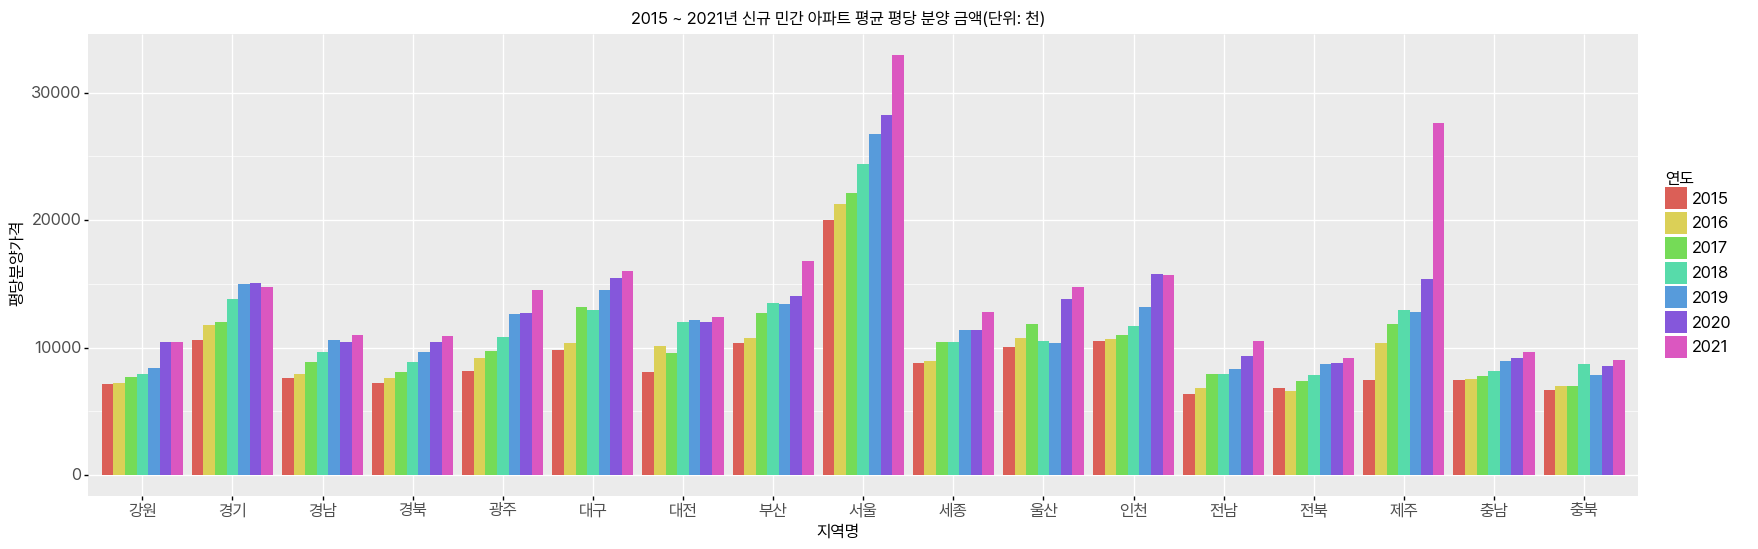

<ggplot: (122950219517)>

In [201]:
# ggplot(데이터프레임, aes(x=x축, y=y축, fill='범례')) # 차트 배경을 만든다.
#   + 차트함수() # 배경 위를 차트를 만든다.
#   + 차트속성함수() # 차트 위에 각종 필요한 정보를 표시한다.
ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도')) \
    + geom_bar(stat='identity', position='dodge') \
    + theme(text=element_text(family='Pretendard', size=12), figure_size=(20, 6)) \
    + ggtitle('2015 ~ 2021년 신규 민간 아파트 평균 평당 분양 금액(단위: 천)')

In [219]:
# 규모별 지역별 평당 분양 금액 합계 피벗 테이블
pre_sale_sum = pre_sale.pivot_table('평당분양가격', '규모구분', '지역명', aggfunc='sum').reset_index()
pre_sale_sum

지역명                     규모구분         강원           경기         경남         경북  \
0                       모든면적 610,107.30   982,515.60 689,571.30 650,354.10   
1             전용면적 102제곱미터초과 730,237.20 1,143,073.80 710,744.10 711,532.80   
2              전용면적 60제곱미터이하 626,538.00 1,014,324.30 662,630.10 643,318.50   
3     전용면적 60제곱미터초과 85제곱미터이하 607,077.90   980,364.00 686,683.80 648,806.40   
4    전용면적 85제곱미터초과 102제곱미터이하 569,101.50 1,060,332.90 852,663.90 551,796.30   

지역명         광주           대구         대전           부산           서울         세종  \
0   822,987.00   969,074.70 774,579.30   944,133.30 1,836,789.90 718,245.00   
1   779,773.50 1,059,481.50 446,252.40 1,008,889.20 1,737,400.50 728,583.90   
2   725,201.40   970,262.70 689,502.00   910,199.40 1,887,382.20 513,140.10   
3   814,489.50   969,916.20 770,906.40   940,368.00 1,834,740.60 684,908.40   
4   359,181.90   832,702.20 245,094.30   940,849.80 2,088,223.50 686,574.90   

지역명         울산           인천         전남         전북           제주         충남  \
0   759,069.30   929,728.80 595,316.70 577,757.40 1,006,575.90 616,638.00   
1   437,860.50 1,083,960.90 687,875.10 640,635.60   775,120.50 609,985.20   
2   610,170.00   924,861.30 564,131.70 592,620.60   790,396.20 613,941.90   
3   763,765.20   935,104.50 595,452.00 575,236.20   998,187.30 618,073.50   
4   222,591.60   963,065.40 557,142.30 606,757.80   422,756.40 614,202.60   

지역명         충북  
0   567,494.40  
1   636,629.40  
2   561,231.00  
3   571,358.70  
4   622,845.30

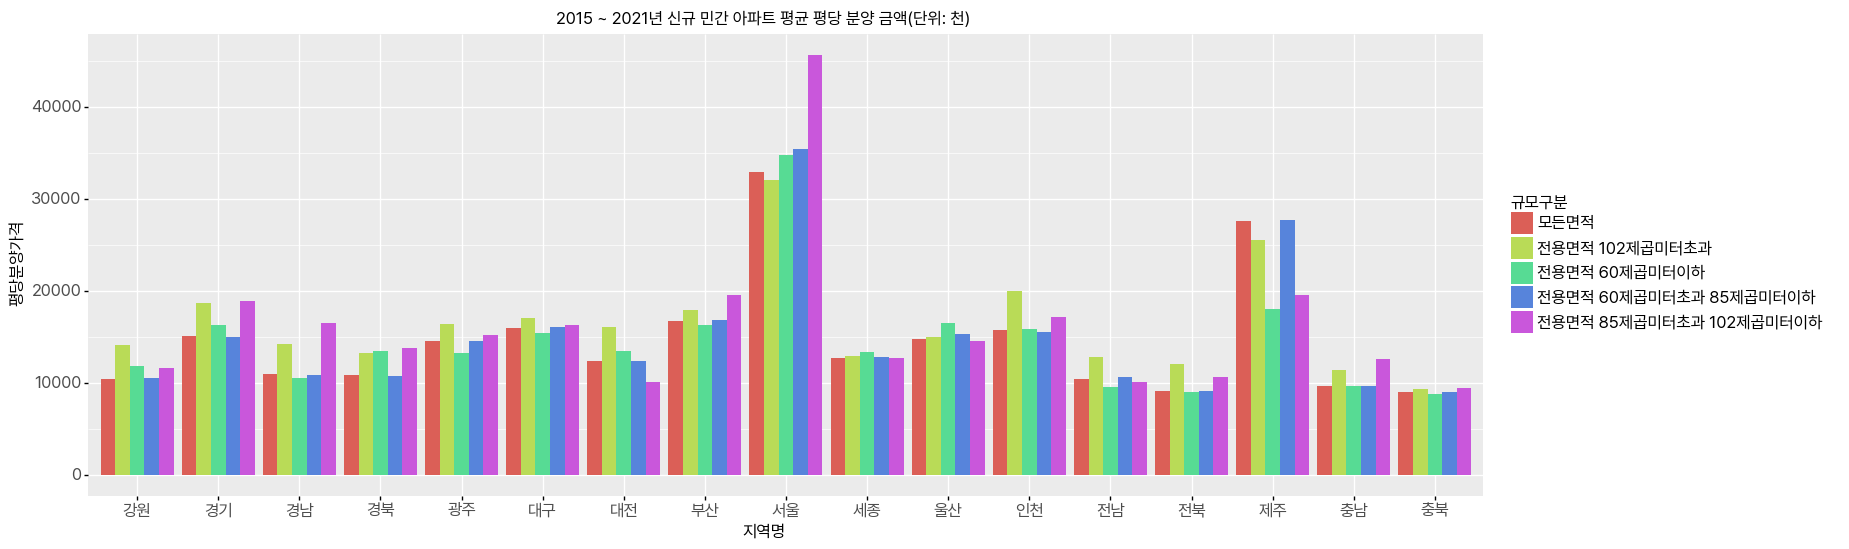

<ggplot: (-9223371913907411957)>

In [209]:
# 규모별 지역별 평당 분양 금액 합계 시각화
(
ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분')) 
    + geom_bar(stat='identity', position='dodge') 
    + theme(text=element_text(family='Pretendard', size=12), figure_size=(18, 6)) 
    + ggtitle('2015 ~ 2021년 신규 민간 아파트 평균 평당 분양 금액(단위: 천)')
)

In [220]:
pre_sale_melt = pd.melt(pre_sale_sum, '규모구분')
pre_sale_melt.rename(columns={'value': '평당분양가격'}, inplace=True)
pre_sale_melt

규모구분 지역명     평당분양가격
0                      모든면적  강원 610,107.30
1            전용면적 102제곱미터초과  강원 730,237.20
2             전용면적 60제곱미터이하  강원 626,538.00
3    전용면적 60제곱미터초과 85제곱미터이하  강원 607,077.90
4   전용면적 85제곱미터초과 102제곱미터이하  강원 569,101.50
..                      ...  ..        ...
80                     모든면적  충북 567,494.40
81           전용면적 102제곱미터초과  충북 636,629.40
82            전용면적 60제곱미터이하  충북 561,231.00
83   전용면적 60제곱미터초과 85제곱미터이하  충북 571,358.70
84  전용면적 85제곱미터초과 102제곱미터이하  충북 622,845.30

[85 rows x 3 columns]

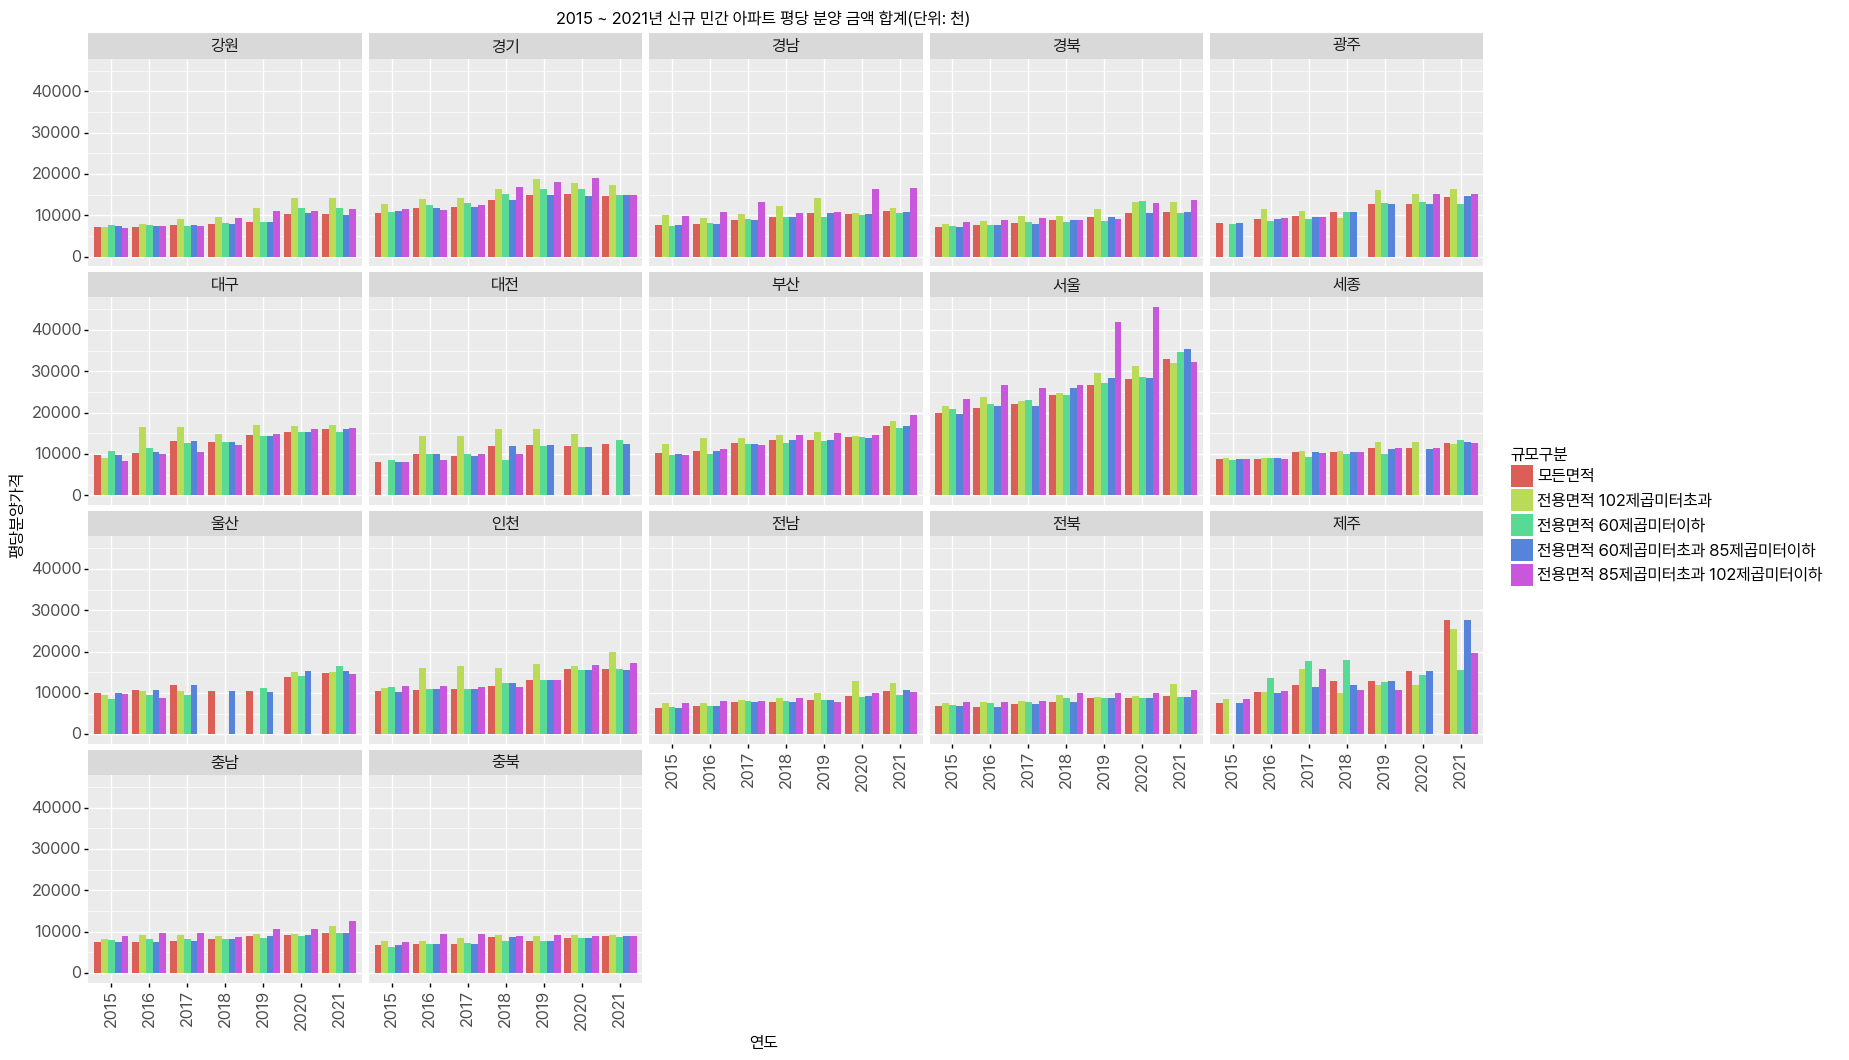

<ggplot: (122948860189)>

In [227]:
(
ggplot(pre_sale, aes(x='연도', y='평당분양가격', fill='규모구분')) 
    + geom_bar(stat='identity', position='dodge') 
    + facet_wrap('지역명')
    + theme(text=element_text(family='Pretendard', size=12), figure_size=(18,12), axis_text_x=element_text(rotation=90)) 
    + ggtitle('2015 ~ 2021년 신규 민간 아파트 평당 분양 금액 합계(단위: 천)')
)

In [228]:
# 사업 규모가 가장 컸던 서울
pre_sale_seoul = pre_sale[pre_sale['지역명'] == '서울']
pre_sale_seoul

지역명                     규모구분    연도   월  분양가격(제곱미터)    평당분양가격
0     서울                     모든면적  2015  10    5,841.00 19,275.30
1     서울            전용면적 60제곱미터이하  2015  10    5,652.00 18,651.60
2     서울   전용면적 60제곱미터초과 85제곱미터이하  2015  10    5,882.00 19,410.60
3     서울  전용면적 85제곱미터초과 102제곱미터이하  2015  10    5,721.00 18,879.30
4     서울           전용면적 102제곱미터초과  2015  10    5,879.00 19,400.70
...   ..                      ...   ...  ..         ...       ...
6290  서울                     모든면적  2021  12    9,983.00 32,943.90
6291  서울            전용면적 60제곱미터이하  2021  12   10,553.00 34,824.90
6292  서울   전용면적 60제곱미터초과 85제곱미터이하  2021  12   10,746.00 35,461.80
6293  서울  전용면적 85제곱미터초과 102제곱미터이하  2021  12    7,274.00 24,004.20
6294  서울           전용면적 102제곱미터초과  2021  12         nan       nan

[375 rows x 6 columns]

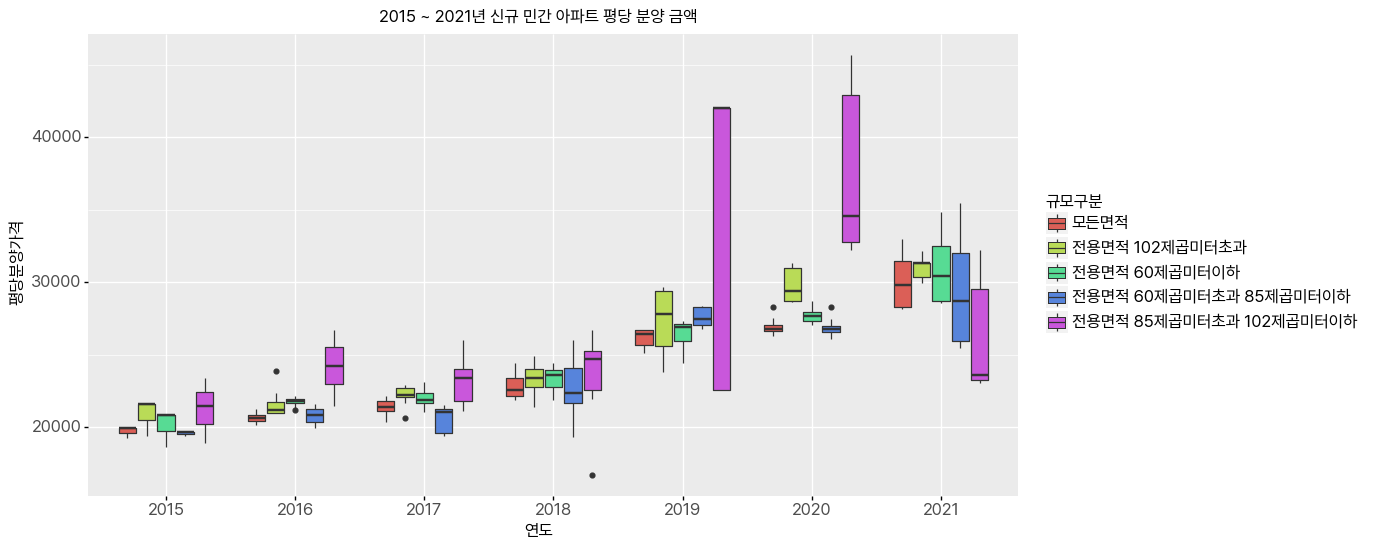

<ggplot: (122948682567)>

In [231]:
(
ggplot(pre_sale_seoul, aes(x='연도', y='평당분양가격', fill='규모구분')) 
    + geom_boxplot() 
    + theme(text=element_text(family='Pretendard', size=12), figure_size=(12,6)) 
    + ggtitle('2015 ~ 2021년 신규 민간 아파트 평당 분양 금액')
)

In [232]:
pre_sale_jeju = pre_sale[pre_sale['지역명'] == '제주']
pre_sale_jeju

지역명                     규모구분    연도   월  분양가격(제곱미터)    평당분양가격
80    제주                     모든면적  2015  10    2,232.00  7,365.60
81    제주            전용면적 60제곱미터이하  2015  10         nan       nan
82    제주   전용면적 60제곱미터초과 85제곱미터이하  2015  10    2,225.00  7,342.50
83    제주  전용면적 85제곱미터초과 102제곱미터이하  2015  10    2,583.00  8,523.90
84    제주           전용면적 102제곱미터초과  2015  10    2,574.00  8,494.20
...   ..                      ...   ...  ..         ...       ...
6370  제주                     모든면적  2021  12    6,574.00 21,694.20
6371  제주            전용면적 60제곱미터이하  2021  12    2,862.00  9,444.60
6372  제주   전용면적 60제곱미터초과 85제곱미터이하  2021  12    6,516.00 21,502.80
6373  제주  전용면적 85제곱미터초과 102제곱미터이하  2021  12    5,924.00 19,549.20
6374  제주           전용면적 102제곱미터초과  2021  12    6,493.00 21,426.90

[375 rows x 6 columns]

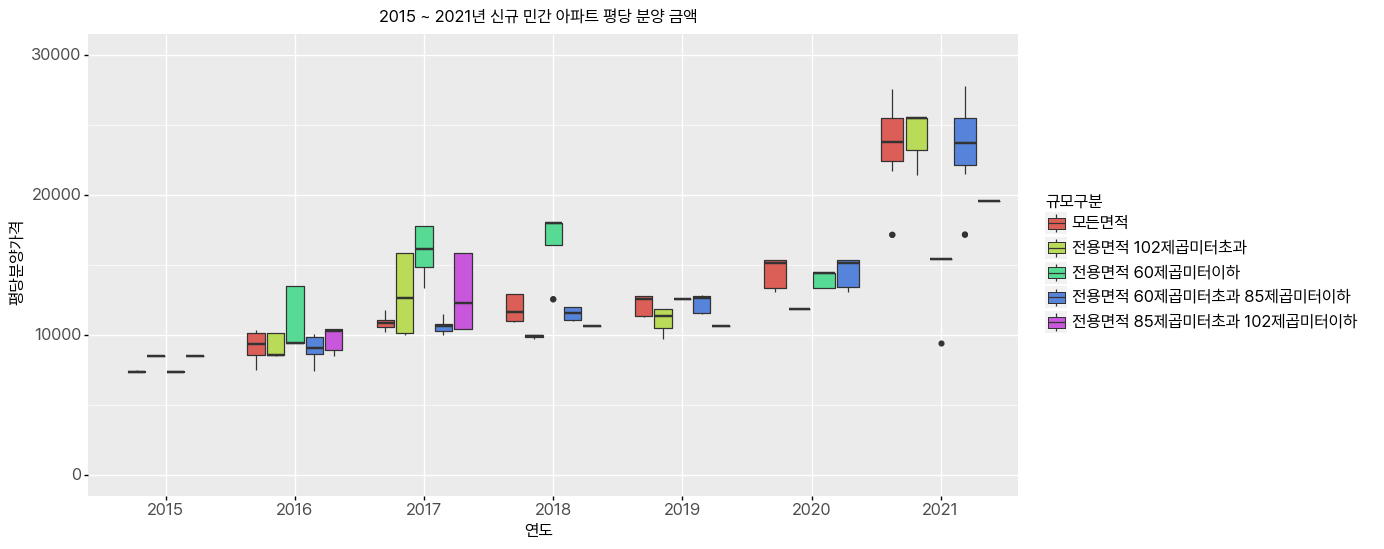

<ggplot: (122948146159)>

In [235]:
(
ggplot(pre_sale_jeju, aes(x='연도', y='평당분양가격', fill='규모구분')) 
    + geom_boxplot() 
    + theme(text=element_text(family='Pretendard', size=12), figure_size=(12,6)) 
    + ggtitle('2015 ~ 2021년 신규 민간 아파트 평당 분양 금액')
    + scale_y_continuous(limits=(0, 30000))
)